In [1]:
import pandas as pd
df = pd.read_csv('D:/开课吧课程资料/核心能力提升班商务智能方向004期/L7/L7-code/code/fresh_comp_offline/tianchi_fresh_comp_train_user.csv')
print(df.head())

    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  


In [2]:
#计算CVR
print(df['behavior_type'].value_counts())

1    21940520
3      659437
2      458491
4      232579
Name: behavior_type, dtype: int64


In [3]:
count_all,count_4 = 0,0
count_user = df['behavior_type'].value_counts()
count_all = count_user[1] + count_user[2] + count_user[3] + count_user[4]
count_4 += count_user[4]
cvr = count_4 / count_all
print('CVR is {}%'.format(cvr*100))

CVR is 0.9985776926023916%


In [4]:
#将time设置为pandas中的datetime类型
df['time'] = pd.to_datetime(df['time'])
df.index = df['time']
print(df.head())

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-08 18:00:00  10001082  285259775              1      97lk14c   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-02 15:00:00  10001082   53616768              1          NaN   
2014-12-12 11:00:00  10001082  151466952              1          NaN   

                     item_category                time  
time                                                    
2014-12-08 18:00:00           4076 2014-12-08 18:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-02 15:00:00           9762 2014-12-02 15:00:00  
2014-12-12 11:00:00           5232 2014-12-12 11:00:00  


# 这里要注意df.index = df['time'] 和 df.set_index('time')的区别
df.index = df['time']是time列保留，df.set_index('time')会把time列删除

In [5]:
from collections import defaultdict
from datetime import datetime,timedelta
def show_count_day(df):
    count_day = defaultdict(int)
    #从2014-11-18到2014-12-18
    str1 = '2014-11-17'
    #将字符串转化为日期
    # temp_date = datetime.strptime(str1, '%Y-%m-%d')
    # delta = timedelta(days = 1)
    # for i in range(31):
    #     temp_date = temp_date + delta
    #     #将时间转化为字符串类型
    #     temp_str = temp_date.strftime('%Y-%m-%d')
    #     #print(temp_str)
    #     #print(df.index)
    #     #df的index为时间
    #     count_day[temp_str] += df[temp_str].shape[0]

    temp_date = datetime.strptime(str1,'%Y-%m-%d')
    delta = timedelta(days=1)
    for i in range(31):
        temp_date = temp_date+delta
        #将时间转化为字符串类型
        temp_str= temp_date.strftime('%Y-%m-%d')
        # count_day[temp_str] += df[temp_str].shape[0]
        #由于pandas和numpy的版本问题？不支持上面的这种写法
        count_day[temp_str] += df[df['time']==temp_str].shape[0]
        print(temp_date)
    print(count_day)

    import matplotlib.pyplot as plt
    df_count_day = pd.DataFrame.from_dict(count_day,orient = 'index',columns = ['count'])
    df_count_day['count'].plot(kind='bar')
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

2014-11-18 00:00:00
2014-11-19 00:00:00
2014-11-20 00:00:00
2014-11-21 00:00:00
2014-11-22 00:00:00
2014-11-23 00:00:00
2014-11-24 00:00:00
2014-11-25 00:00:00
2014-11-26 00:00:00
2014-11-27 00:00:00
2014-11-28 00:00:00
2014-11-29 00:00:00
2014-11-30 00:00:00
2014-12-01 00:00:00
2014-12-02 00:00:00
2014-12-03 00:00:00
2014-12-04 00:00:00
2014-12-05 00:00:00
2014-12-06 00:00:00
2014-12-07 00:00:00
2014-12-08 00:00:00
2014-12-09 00:00:00
2014-12-10 00:00:00
2014-12-11 00:00:00
2014-12-12 00:00:00
2014-12-13 00:00:00
2014-12-14 00:00:00
2014-12-15 00:00:00
2014-12-16 00:00:00
2014-12-17 00:00:00
2014-12-18 00:00:00
defaultdict(<class 'int'>, {'2014-11-18': 25288, '2014-11-19': 25930, '2014-11-20': 23768, '2014-11-21': 24738, '2014-11-22': 25759, '2014-11-23': 28399, '2014-11-24': 26751, '2014-11-25': 26834, '2014-11-26': 24689, '2014-11-27': 27150, '2014-11-28': 28492, '2014-11-29': 30200, '2014-11-30': 31071, '2014-12-01': 28991, '2014-12-02': 25406, '2014-12-03': 25974, '2014-12-04': 27

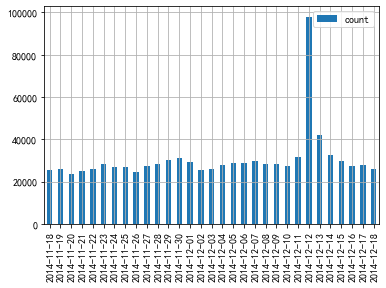

In [7]:
show_count_day(df)

In [8]:
#属于商品子集p的操作次数
df_p = pd.read_csv('D:/开课吧课程资料/核心能力提升班商务智能方向004期/L7/L7-code/code/fresh_comp_offline/tianchi_fresh_comp_train_item.csv')
#使用reset_index将index还原
#df = pd.merge(df,df_p,on = ['item_id']).set_index('time')
#如果加上set_index('time') 相当于把两个表的时间merger之后再set为index，之前的index会改变，这不是我们想要的
df = pd.merge(df,df_p,on = ['item_id'])
print(df.shape)
print(df.head())




(4279962, 8)
    user_id    item_id  behavior_type user_geohash  item_category_x  \
0  10001082  275221686              1          NaN            10576   
1  10001082  275221686              1          NaN            10576   
2  10001082  275221686              1          NaN            10576   
3  10001082  275221686              1          NaN            10576   
4  10001082  275221686              1          NaN            10576   

                 time item_geohash  item_category_y  
0 2014-12-03 01:00:00          NaN            10576  
1 2014-12-13 14:00:00          NaN            10576  
2 2014-12-08 07:00:00          NaN            10576  
3 2014-12-08 07:00:00          NaN            10576  
4 2014-12-08 00:00:00          NaN            10576  


2014-11-18 00:00:00
2014-11-19 00:00:00
2014-11-20 00:00:00
2014-11-21 00:00:00
2014-11-22 00:00:00
2014-11-23 00:00:00
2014-11-24 00:00:00
2014-11-25 00:00:00
2014-11-26 00:00:00
2014-11-27 00:00:00
2014-11-28 00:00:00
2014-11-29 00:00:00
2014-11-30 00:00:00
2014-12-01 00:00:00
2014-12-02 00:00:00
2014-12-03 00:00:00
2014-12-04 00:00:00
2014-12-05 00:00:00
2014-12-06 00:00:00
2014-12-07 00:00:00
2014-12-08 00:00:00
2014-12-09 00:00:00
2014-12-10 00:00:00
2014-12-11 00:00:00
2014-12-12 00:00:00
2014-12-13 00:00:00
2014-12-14 00:00:00
2014-12-15 00:00:00
2014-12-16 00:00:00
2014-12-17 00:00:00
2014-12-18 00:00:00
defaultdict(<class 'int'>, {'2014-11-18': 2434, '2014-11-19': 3542, '2014-11-20': 2435, '2014-11-21': 3442, '2014-11-22': 3051, '2014-11-23': 8697, '2014-11-24': 7916, '2014-11-25': 3863, '2014-11-26': 2100, '2014-11-27': 2687, '2014-11-28': 2528, '2014-11-29': 11916, '2014-11-30': 2646, '2014-12-01': 8578, '2014-12-02': 3677, '2014-12-03': 2143, '2014-12-04': 5659, '2014-12-05

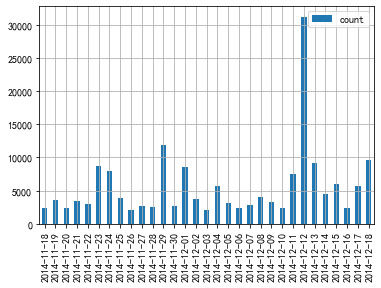

In [9]:
show_count_day(df)

{'2014-12-12 00': [29817, 336, 285, 758], '2014-12-12 01': [8736, 101, 288, 75], '2014-12-12 02': [13356, 24, 196, 22], '2014-12-12 03': [4530, 14, 42, 27], '2014-12-12 04': [4280, 11, 42, 10], '2014-12-12 05': [1243, 4, 46, 27], '2014-12-12 06': [6992, 20, 388, 60], '2014-12-12 07': [12673, 24, 102, 80], '2014-12-12 08': [19034, 40, 462, 558], '2014-12-12 09': [13913, 39, 176, 130], '2014-12-12 10': [43971, 55, 522, 210], '2014-12-12 11': [29353, 1662, 468, 140], '2014-12-12 12': [32532, 60, 211, 144], '2014-12-12 13': [9523, 65, 1811, 1745], '2014-12-12 14': [23214, 74, 182, 134], '2014-12-12 15': [9205, 51, 204, 122], '2014-12-12 16': [8948, 50, 145, 83], '2014-12-12 17': [20686, 225, 274, 165], '2014-12-12 18': [8288, 75, 109, 79], '2014-12-12 19': [19089, 48, 171, 118], '2014-12-12 20': [16837, 93, 198, 119], '2014-12-12 21': [20207, 85, 325, 176], '2014-12-12 22': [22404, 109, 373, 189], '2014-12-12 23': [25051, 1745, 1028, 197]}


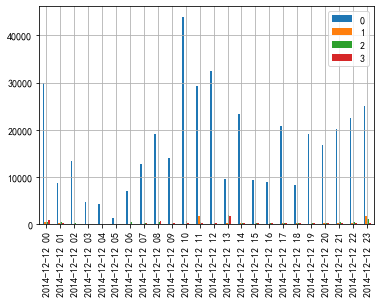

In [13]:
import matplotlib.pyplot as plt
def show_count_hour(date1):
    count_hour = {}
    # 设置初始化值
    for i in range(24):
        time_str = date1 + ' %0.2d' % i
        #print(time_str)
        count_hour[time_str] = [0,0,0,0]
        # temp = df[time_str]['behavior_type'].value_counts()
        #由于pandas和numpy的版本问题？不支持上面的这种写法
        temp = df[df['time']==time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1] += temp[temp.index[j]]
    print(count_hour)
    #从字典类型生成DataFrame
    df_count_hour = pd.DataFrame.from_dict(count_hour,orient = 'index')
    df_count_hour.plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
show_count_hour('2014-12-12')